<div class='alert alert-success'>
    <h1 align="center">Local Search Algorithms: Simulated Annealing for N-Queens</h1> 
    <h3 align="center">Artificial Intelligece Course (Fall 2021)</h3>
    <h5 align="center">Seyed Naser RAZAVI <a href='http://www.snrazavi.ir/ai-slides/'>(website)</a></h5>
</div>

In [1]:
import sys
import time
import math
import random
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import clear_output

from utils import timed
from nqueens import NQueensState, NQueensStatePermutation
from nqueens import create_animation, summarize_history

plt.rcParams['figure.figsize'] = (6, 6)

## N-Queens Problem
- **Goal**: Place N queens on a N-by-N chess board so that no two queens can attack each other.
- Thus a solution requires that no two queens share the same row, column or diagonal.

<p align="center">
    <img src="imgs/Four-Queens-Local-Search.png" width="80%">
</p>
<h6 align="center">4-Queens problem</h6>

### Problem formulation: First formulation
- **States**: each column contains only one queen.
- **Actions**: move a queen to another row in its column.
- **State Space Size**: $N^N$


### Problem formulation: Second formulation (Permuatation)
- **States**: each column and each row contains only one queen.
- **Actions**: move a queen to another row in its column which is not occupied.
- **State Space Size**: $N!$

In [2]:
state = NQueensState.random_state(N=8)
print(state)

[7, 1, 4, 2, 2, 5, 4, 8] <6>


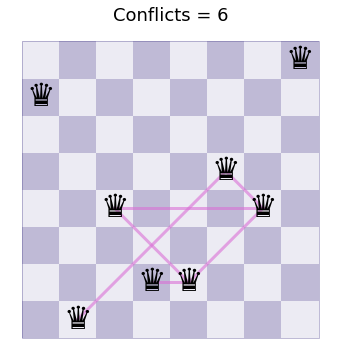

In [3]:
state.plot(show_conflicts=True)

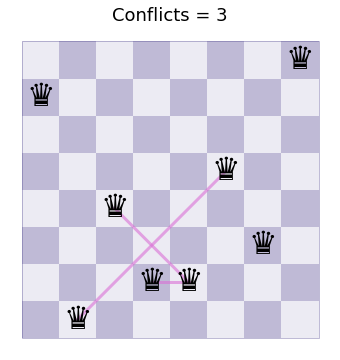

In [4]:
best_neighbor = state.best_neighbor()
best_neighbor.plot(show_conflicts=True)

In [5]:
best_neighbor

NQueensState(queens=[7, 1, 4, 2, 2, 5, 3, 8])

## Simulated Annealing
<img src="imgs/simulated_annealing.png" width="80%">

In [6]:
class SimulatedAnnealing:
    def __init__(self):
        self.history = []
        self.T = None
    
    def search(self, state, T0=10, alpha=0.99, tol=1e-8, verbose=0):
        self.T = T0
        current = state

        while True:

            clear_output(wait=True)
            if verbose == 0: print(f'T = {self.T:.8f}, Conflicts = {current.conflicts():d}')
            elif verbose == 1: print(current)
            elif verbose == 2: current.plot(show_conflicts=False)
            elif verbose == 3: current.plot(show_conflicts=True)
            
            self.history.append(current)

            if self.T < tol or current.conflicts() == 0:
                return current

            neighbor = current.random_neighbor()
            delta_E = current.conflicts() - neighbor.conflicts()
            if delta_E >= 0: 
                current = neighbor
            elif random.random() < math.exp(delta_E / self.T):
                current = neighbor

            self.T = alpha * self.T

        return current
    
    def __call__(self, state, T0=10, alpha=0.99, tol=1e-8, verbose=0):
        return self.search(state, T0, alpha, tol, verbose)
    

    def plot_history(self):
        plt.figure(figsize=(12, 4))

        conflicts = [state.conflicts() for state in self.history]
        plt.plot(range(len(conflicts)), conflicts)
        plt.xlabel('Iteration')
        plt.ylabel('Conflicts')
        plt.show()

In [7]:
initial_state = NQueensState.random_state(100)

sa = SimulatedAnnealing()
t, solution = timed(sa, state=initial_state, T0=10, alpha=.999, verbose=0)
print(f'\n\n<Solution with {solution.conflicts()} conflicts found in {t:.2f} secs.>\n {solution}')

T = 0.00000001, Conflicts = 4


<Solution with 4 conflicts found in 86.42 secs.>
 [58, 4, 16, 43, 32, 55, 42, 66, 75, 50, 45, 56, 18, 1, 9, 41, 99, 37, 51, 12, 71, 84, 53, 57, 2, 27, 90, 38, 82, 61, 19, 83, 80, 30, 87, 97, 79, 47, 24, 40, 64, 98, 34, 65, 86, 100, 76, 52, 94, 25, 20, 35, 96, 44, 72, 13, 77, 14, 3, 49, 21, 88, 81, 31, 60, 63, 89, 46, 17, 8, 36, 22, 28, 67, 73, 92, 59, 85, 91, 10, 95, 6, 29, 15, 93, 11, 23, 5, 48, 29, 70, 68, 54, 78, 74, 62, 7, 69, 39, 26] <4>


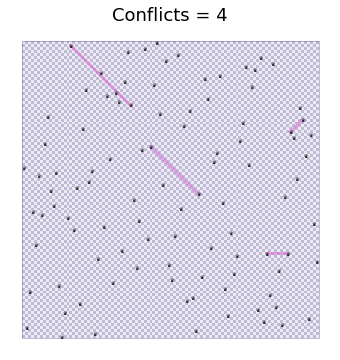

In [8]:
solution.plot(width=1024, height=1024, show_conflicts=True)

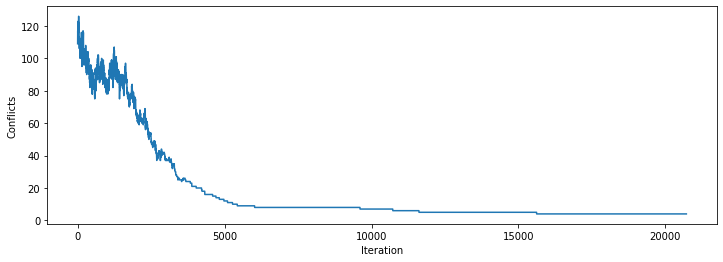

In [9]:
sa.plot_history()

In [10]:
def update_plot(i, show_conflicts):
    state = sa.history[i - 1]
    state.plot(width=1024, height=1024, show_conflicts=show_conflicts)

In [11]:
i = widgets.IntSlider(value=1, min=1, max=len(sa.history), description='i:')
show_conflicts = widgets.Checkbox(value=True, description='Show conflicts')

widgets.interact(update_plot, i=i, show_conflicts=show_conflicts);

interactive(children=(IntSlider(value=1, description='i:', max=20714, min=1), Checkbox(value=True, description…

## Permutation

In [12]:
initial_state = NQueensStatePermutation.random_state(100)

sa = SimulatedAnnealing()
t, solution = timed(sa, state=initial_state, T0=10, alpha=.999, verbose=0)
print(f'\n\n<Solution with {solution.conflicts()} conflicts found in {t:.2f} secs.>\n {solution}')

T = 0.00080705, Conflicts = 0


<Solution with 0 conflicts found in 34.47 secs.>
 [92, 54, 57, 36, 41, 43, 55, 29, 39, 24, 72, 76, 12, 95, 82, 42, 93, 5, 77, 44, 46, 62, 85, 33, 81, 48, 27, 98, 34, 38, 50, 60, 22, 2, 17, 7, 87, 31, 20, 97, 75, 69, 10, 45, 6, 66, 51, 99, 90, 83, 63, 47, 8, 89, 49, 73, 13, 32, 21, 19, 26, 53, 94, 61, 1, 64, 96, 78, 65, 88, 11, 79, 86, 3, 16, 91, 23, 84, 59, 14, 4, 25, 37, 70, 68, 74, 15, 35, 100, 28, 30, 40, 56, 71, 80, 9, 67, 58, 18, 52] <0>


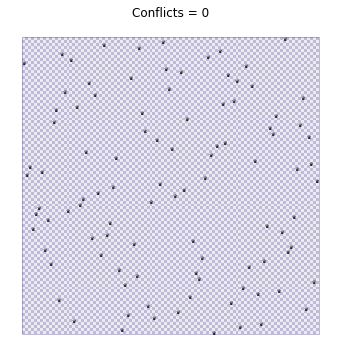

In [13]:
solution.plot(width=1024, height=1024, show_conflicts=True)

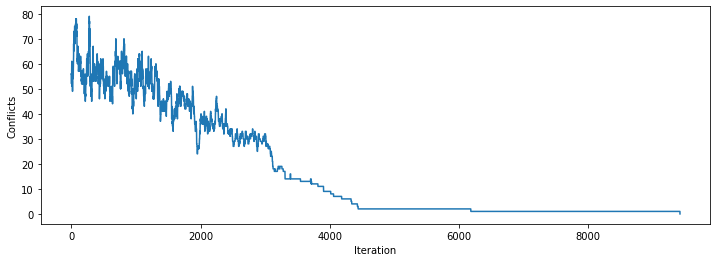

In [14]:
sa.plot_history()

In [15]:
i = widgets.IntSlider(value=1, min=1, max=len(sa.history), description='i:')
show_conflicts = widgets.Checkbox(value=True, description='Show conflicts')

widgets.interact(update_plot, i=i, show_conflicts=show_conflicts);

interactive(children=(IntSlider(value=1, description='i:', max=9421, min=1), Checkbox(value=True, description=…

## Animation

In [23]:
N = 10
initial_state = NQueensState.random_state(N)

sa = SimulatedAnnealing()
t, solution = timed(sa, state=initial_state, T0=10, alpha=.98, verbose=0)
print(f'\n\n<Solution with {solution.conflicts()} conflicts found in {t:.2f} secs.>\n {solution}')

T = 0.00000006, Conflicts = 0


<Solution with 0 conflicts found in 1.66 secs.>
 [1, 6, 9, 7, 2, 4, 8, 10, 5, 3] <0>


In [24]:
len(sa.history)

940

In [25]:
history = summarize_history(sa.history)
print(len(history))

135


In [26]:
anim = create_animation(history, figsize=(6, 6))
anim.save(f'imgs/{N}-queens-sa.gif', writer='imagemagick')
clear_output()

<img src="imgs/10-queens-sa.gif" width="50%">

In [27]:
anim = create_animation(history, figsize=(12, 4), plot_objective=True)
anim.save(f'imgs/{N}-queens-sa-with-objective.gif', writer='imagemagick')
clear_output()

<img src="imgs/10-queens-sa-with-objective.gif">